In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os #we will use the function listdir to list files in a folder
import math #to apply absolute value
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('marketing_customer_analysis.csv', sep=",") #reading the data
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
data.shape #get the number of rows and columns

(9134, 24)

In [4]:
ordered_columns = sorted(data.columns, reverse=False) #ordering the columns
ordered_columns

['Coverage',
 'Customer',
 'Customer Lifetime Value',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy',
 'Policy Type',
 'Renew Offer Type',
 'Response',
 'Sales Channel',
 'State',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size']

In [5]:
# order the columns of data in this order
data = data[ordered_columns]
data.head()

,Coverage,Customer,Customer Lifetime Value,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Number of Policies,Policy,Policy Type,Renew Offer Type,Response,Sales Channel,State,Total Claim Amount,Vehicle Class,Vehicle Size
0,Basic,BU79786,2763.519279,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,...,1,Corporate L3,Corporate Auto,Offer1,No,Agent,Washington,384.811147,Two-Door Car,Medsize
1,Extended,QZ44356,6979.535903,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,...,8,Personal L3,Personal Auto,Offer3,No,Agent,Arizona,1131.464935,Four-Door Car,Medsize
2,Premium,AI49188,12887.431650,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,...,2,Personal L3,Personal Auto,Offer1,No,Agent,Nevada,566.472247,Two-Door Car,Medsize
3,Basic,WW63253,7645.861827,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,...,7,Corporate L2,Corporate Auto,Offer1,No,Call Center,California,529.881344,SUV,Medsize
4,Basic,HB64268,2813.692575,Bachelor,2/3/11,Employed,M,43836,Rural,Single,...,1,Personal L1,Personal Auto,Offer1,No,Agent,Washington,138.130879,Four-Door Car,Medsize


In [6]:
data.columns = [data.columns[i].lower().replace(' ','_') for i in range(len(data.columns))] #standardizing the data columns
data.columns

Index(['coverage', 'customer', 'customer_lifetime_value', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'income',
       'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy',
       'policy_type', 'renew_offer_type', 'response', 'sales_channel', 'state',
       'total_claim_amount', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [7]:
data.head()

,coverage,customer,customer_lifetime_value,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,...,number_of_policies,policy,policy_type,renew_offer_type,response,sales_channel,state,total_claim_amount,vehicle_class,vehicle_size
0,Basic,BU79786,2763.519279,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,...,1,Corporate L3,Corporate Auto,Offer1,No,Agent,Washington,384.811147,Two-Door Car,Medsize
1,Extended,QZ44356,6979.535903,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,...,8,Personal L3,Personal Auto,Offer3,No,Agent,Arizona,1131.464935,Four-Door Car,Medsize
2,Premium,AI49188,12887.431650,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,...,2,Personal L3,Personal Auto,Offer1,No,Agent,Nevada,566.472247,Two-Door Car,Medsize
3,Basic,WW63253,7645.861827,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,...,7,Corporate L2,Corporate Auto,Offer1,No,Call Center,California,529.881344,SUV,Medsize
4,Basic,HB64268,2813.692575,Bachelor,2/3/11,Employed,M,43836,Rural,Single,...,1,Personal L1,Personal Auto,Offer1,No,Agent,Washington,138.130879,Four-Door Car,Medsize


In [8]:
y = data['total_claim_amount'] #splitting the target and other columns
X = data.drop(['total_claim_amount'], axis=1)
X.head()

,coverage,customer,customer_lifetime_value,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,...,number_of_open_complaints,number_of_policies,policy,policy_type,renew_offer_type,response,sales_channel,state,vehicle_class,vehicle_size
0,Basic,BU79786,2763.519279,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,...,0,1,Corporate L3,Corporate Auto,Offer1,No,Agent,Washington,Two-Door Car,Medsize
1,Extended,QZ44356,6979.535903,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,...,0,8,Personal L3,Personal Auto,Offer3,No,Agent,Arizona,Four-Door Car,Medsize
2,Premium,AI49188,12887.431650,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,...,0,2,Personal L3,Personal Auto,Offer1,No,Agent,Nevada,Two-Door Car,Medsize
3,Basic,WW63253,7645.861827,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,...,0,7,Corporate L2,Corporate Auto,Offer1,No,Call Center,California,SUV,Medsize
4,Basic,HB64268,2813.692575,Bachelor,2/3/11,Employed,M,43836,Rural,Single,...,0,1,Personal L1,Personal Auto,Offer1,No,Agent,Washington,Four-Door Car,Medsize


In [9]:
numerical = X.select_dtypes(include = np.number)#splitting categorical and numerical columns
categoricals = X.select_dtypes(include = np.object)

In [10]:
categoricals = categoricals.drop(['customer','effective_to_date'], axis = 1) #removing the columns that won't affect our dataframe
categoricals

,coverage,education,employmentstatus,gender,location_code,marital_status,policy,policy_type,renew_offer_type,response,sales_channel,state,vehicle_class,vehicle_size
0,Basic,Bachelor,Employed,F,Suburban,Married,Corporate L3,Corporate Auto,Offer1,No,Agent,Washington,Two-Door Car,Medsize
1,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal L3,Personal Auto,Offer3,No,Agent,Arizona,Four-Door Car,Medsize
2,Premium,Bachelor,Employed,F,Suburban,Married,Personal L3,Personal Auto,Offer1,No,Agent,Nevada,Two-Door Car,Medsize
3,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate L2,Corporate Auto,Offer1,No,Call Center,California,SUV,Medsize
4,Basic,Bachelor,Employed,M,Rural,Single,Personal L1,Personal Auto,Offer1,No,Agent,Washington,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,Basic,Bachelor,Employed,M,Urban,Married,Personal L1,Personal Auto,Offer2,No,Web,California,Four-Door Car,Medsize
9130,Extended,College,Employed,F,Suburban,Divorced,Corporate L3,Corporate Auto,Offer1,Yes,Branch,California,Four-Door Car,Medsize
9131,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate L2,Corporate Auto,Offer1,No,Branch,California,Four-Door Car,Medsize
9132,Extended,College,Employed,M,Suburban,Married,Personal L2,Personal Auto,Offer3,No,Branch,California,Four-Door Car,Large


In [11]:
#one Hot encoding using 4 different columns

enc = OneHotEncoder(sparse=False)
columns_to_one_hot = ['marital_status','gender','policy_type','response']
encoded_array = enc.fit_transform(categoricals.loc[:,columns_to_one_hot])
categoricals_encoded = pd.DataFrame(encoded_array,columns=enc.get_feature_names_out() )
categoricals_sklearn_encoded = pd.concat([categoricals,categoricals_encoded],axis=1)
categoricals_sklearn_encoded.drop(labels= columns_to_one_hot,axis=1,inplace=True)
categoricals_sklearn_encoded

,coverage,education,employmentstatus,location_code,policy,renew_offer_type,sales_channel,state,vehicle_class,vehicle_size,marital_status_Divorced,marital_status_Married,marital_status_Single,gender_F,gender_M,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,response_No,response_Yes
0,Basic,Bachelor,Employed,Suburban,Corporate L3,Offer1,Agent,Washington,Two-Door Car,Medsize,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,Extended,Bachelor,Unemployed,Suburban,Personal L3,Offer3,Agent,Arizona,Four-Door Car,Medsize,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,Premium,Bachelor,Employed,Suburban,Personal L3,Offer1,Agent,Nevada,Two-Door Car,Medsize,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,Basic,Bachelor,Unemployed,Suburban,Corporate L2,Offer1,Call Center,California,SUV,Medsize,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,Basic,Bachelor,Employed,Rural,Personal L1,Offer1,Agent,Washington,Four-Door Car,Medsize,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,Basic,Bachelor,Employed,Urban,Personal L1,Offer2,Web,California,Four-Door Car,Medsize,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9130,Extended,College,Employed,Suburban,Corporate L3,Offer1,Branch,California,Four-Door Car,Medsize,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
9131,Extended,Bachelor,Unemployed,Suburban,Corporate L2,Offer1,Branch,California,Four-Door Car,Medsize,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
9132,Extended,College,Employed,Suburban,Personal L2,Offer3,Branch,California,Four-Door Car,Large,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [12]:
#label encoding
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'renew_offer_type'.
categoricals['renew_offer_type']= label_encoder.fit_transform(categoricals['renew_offer_type'])
  
categoricals['renew_offer_type'].unique()

array([0, 2, 1, 3])

In [13]:
#ordinal encoding (method 1 without using OrdinalEncoder)
scale_mapper = {'Small':1, 'Medsize':2, 'Large':3}
categoricals['vehicle_size'] = categoricals['vehicle_size'].replace(scale_mapper) 
categoricals['vehicle_size']

0       2
1       2
2       2
3       2
4       2
       ..
9129    2
9130    2
9131    2
9132    3
9133    2
Name: vehicle_size, Length: 9134, dtype: int64

In [14]:
# concatinating the numerical and encoded categorical columns
numerical = X.select_dtypes(include = np.number)
X = pd.concat([numerical, categoricals['renew_offer_type'] , categoricals['vehicle_size'], categoricals_encoded], axis=1)
X.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,renew_offer_type,vehicle_size,marital_status_Divorced,marital_status_Married,marital_status_Single,gender_F,gender_M,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,response_No,response_Yes
0,2763.519279,56274,69,32,5,0,1,0,2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,6979.535903,0,94,13,42,0,8,2,2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,12887.431650,48767,108,18,38,0,2,0,2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,7645.861827,0,106,18,65,0,7,0,2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,2813.692575,43836,73,12,44,0,1,0,2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


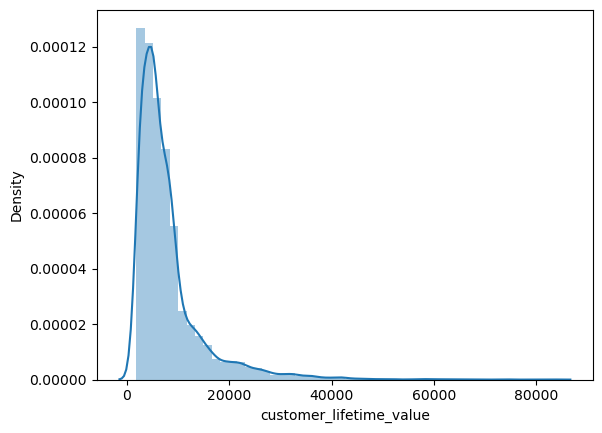

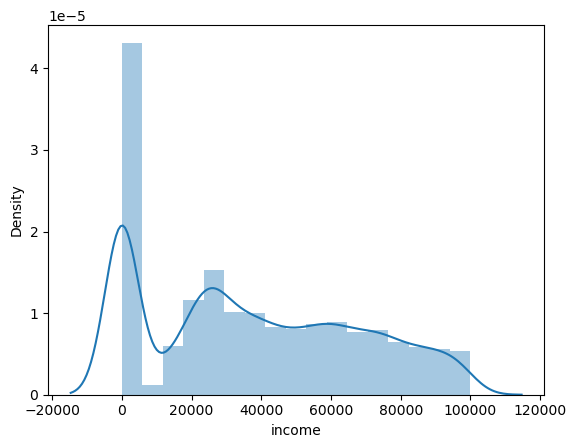

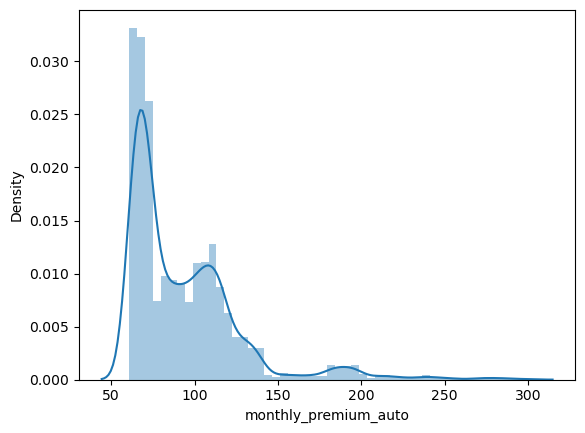

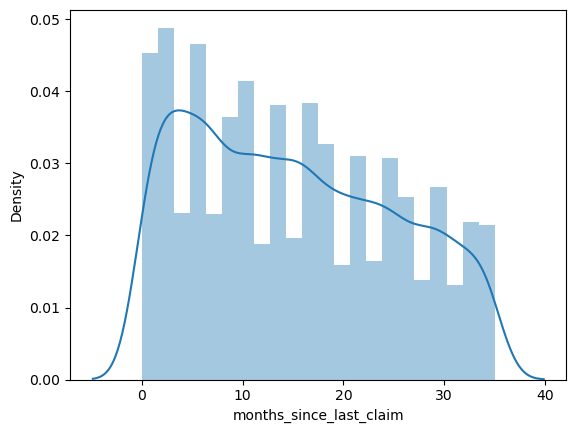

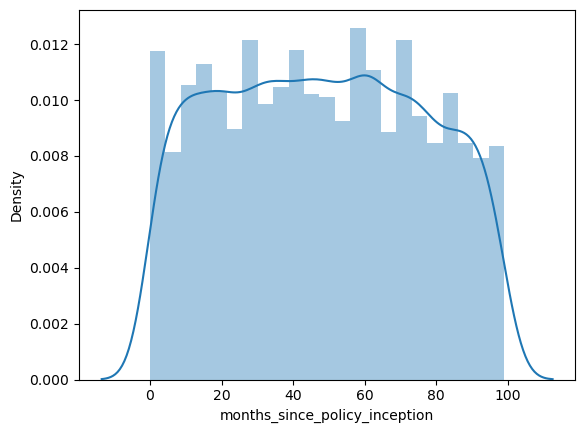

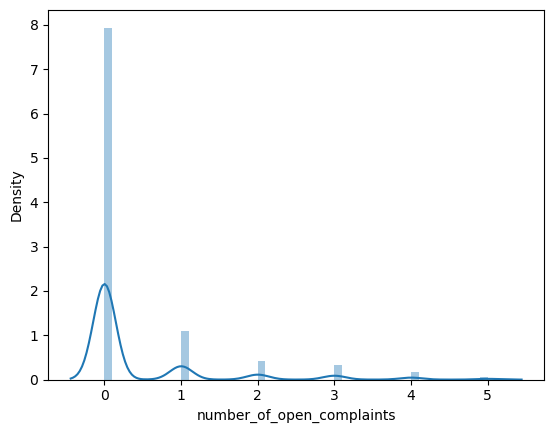

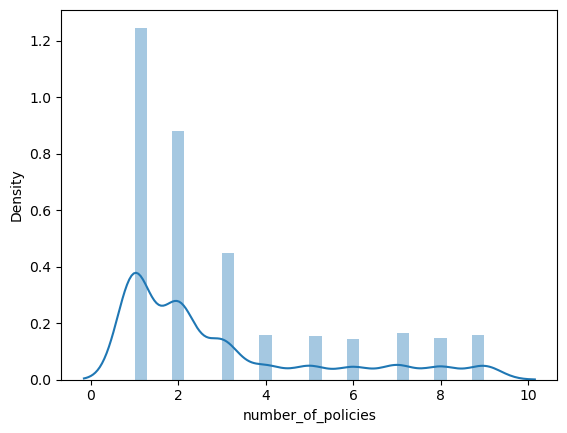

In [15]:
for column in numerical.columns:
    sns.distplot(data[column])
    plt.show()

# use the concept of multicollinearity and remove insignificant variables

In [16]:
round(data.corr(),2)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.00,0.02,0.40,0.01,0.01,-0.04,0.02,0.23
income,0.02,1.00,-0.02,-0.03,-0.00,0.01,-0.01,-0.36
monthly_premium_auto,0.40,-0.02,1.00,0.01,0.02,-0.01,-0.01,0.63
months_since_last_claim,0.01,-0.03,0.01,1.00,-0.04,0.01,0.01,0.01
months_since_policy_inception,0.01,-0.00,0.02,-0.04,1.00,-0.00,-0.01,0.00
number_of_open_complaints,-0.04,0.01,-0.01,0.01,-0.00,1.00,0.00,-0.01
number_of_policies,0.02,-0.01,-0.01,0.01,-0.01,0.00,1.00,-0.00
total_claim_amount,0.23,-0.36,0.63,0.01,0.00,-0.01,-0.00,1.00


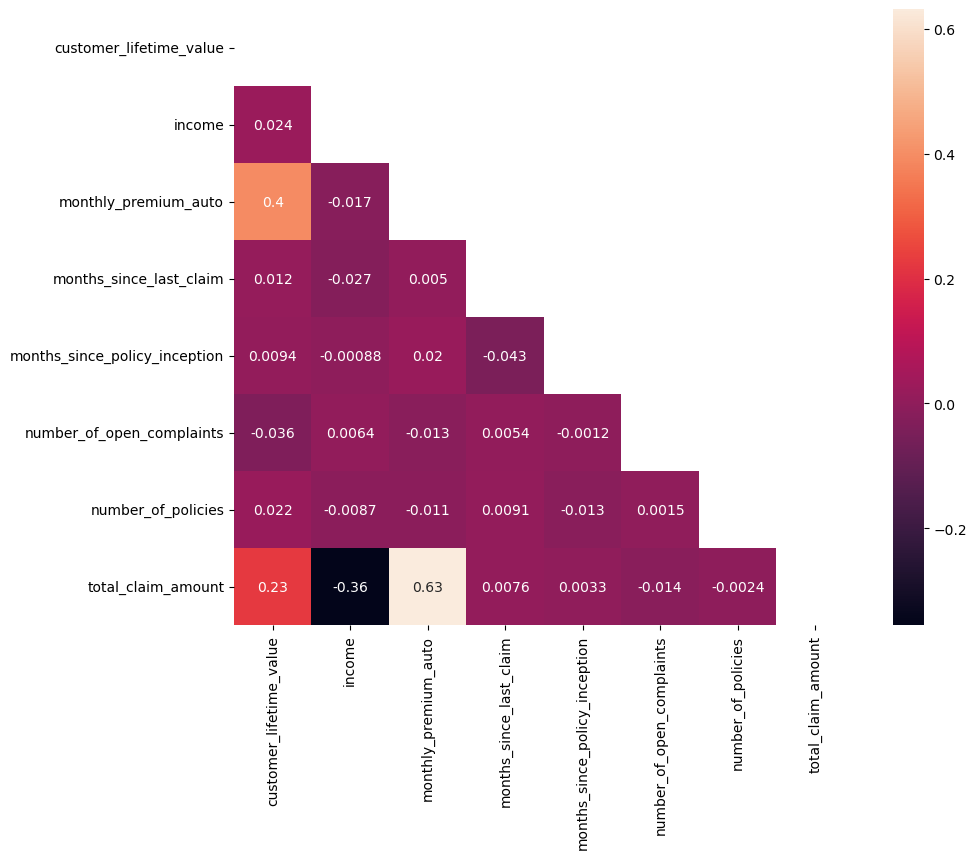

In [17]:
#HEATMAP
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(data.corr(), mask=mask, annot=True)
plt.show()

**Comment:** **Comment:** Based on heat meap, 'monthly_premium_auto' and  'customer_lifetime_value' are correlated with the target 'total_claim_amount'. However, both 'monthly_premium_auto' and  'customer_lifetime_value are also correlated with each other (0.4). SO maybe, the less important column which is 'customer_lifetime_value' can be removed

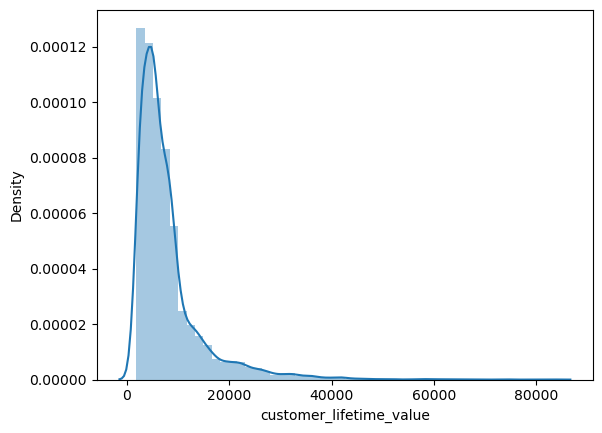

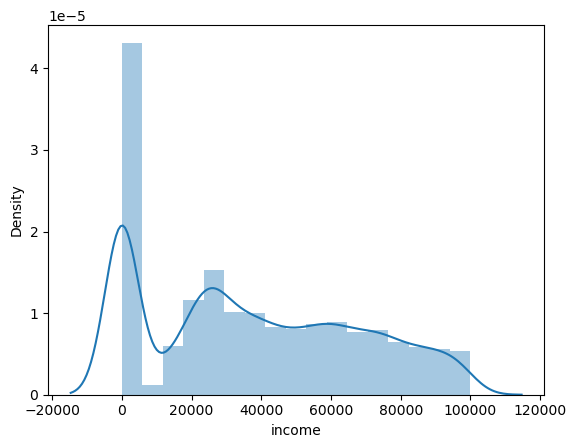

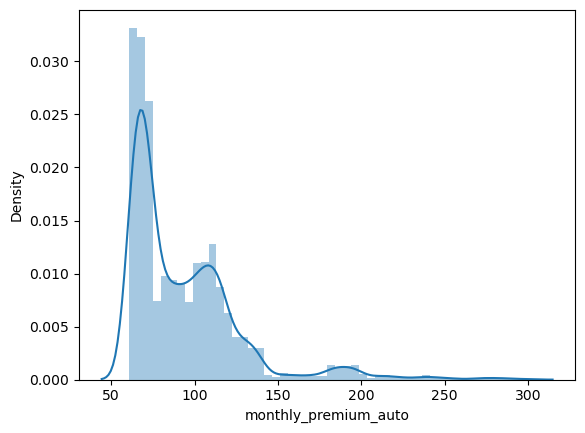

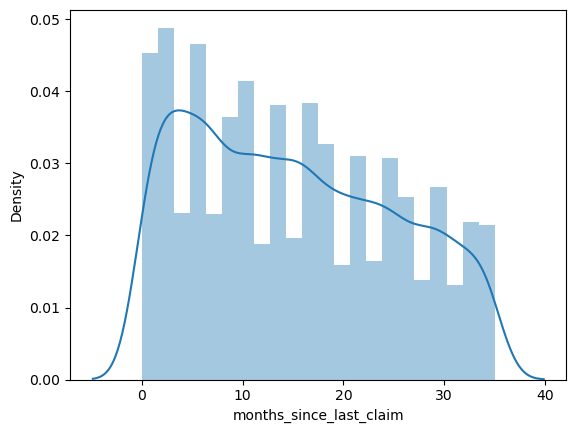

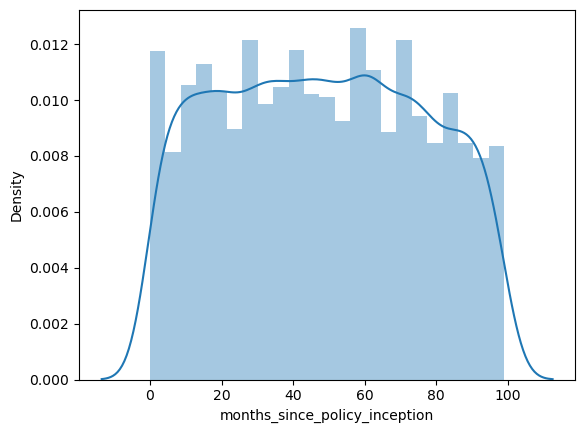

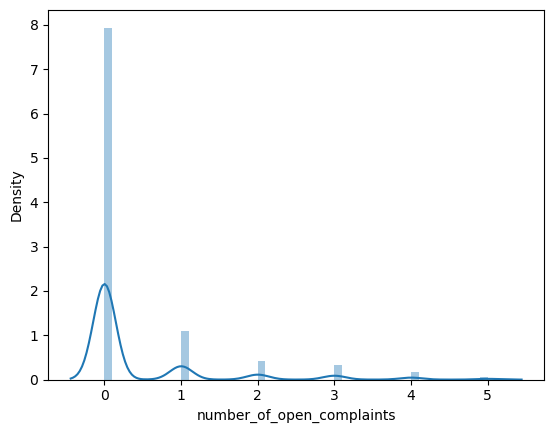

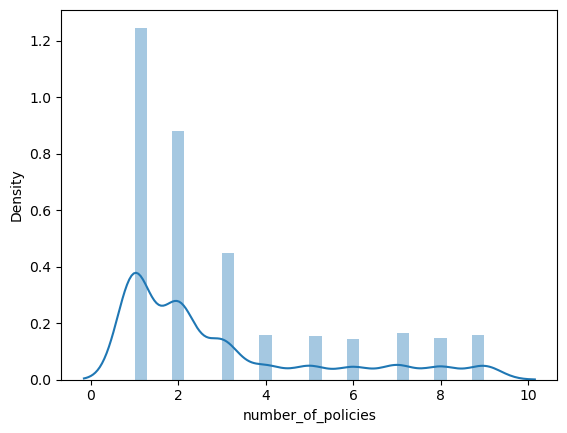

In [18]:
for column in numerical.columns:
    sns.distplot(data[column])
    plt.show()

**Comment:** Comment: Here we see that 'monthly_premium_auto' has a more normal distribution than 'customer_lifetime_value'. So, maybe it's good to keep it. I will not remove it

#  use a different method of scaling the numerical variables

In [19]:
# Box cox transformation
data_trans = data.copy()

def boxcox_transform(df):
    
    _ci = {column: None for column in numerical}
    for column in numerical:
        # since i know any columns should take negative numbers, to avoid -inf in df
        data_trans[column] = np.where(data_trans[column]<=0, np.NAN, data_trans[column]) 
        data_trans[column] = data_trans[column].fillna(data_trans[column].mean())
        transformed_data, ci = stats.boxcox(data_trans[column])
        data_trans[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci
data, _ci = boxcox_transform(data_trans)
data_trans.head()

,coverage,customer,customer_lifetime_value,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,...,number_of_policies,policy,policy_type,renew_offer_type,response,sales_channel,state,total_claim_amount,vehicle_class,vehicle_size
0,Basic,BU79786,2.703839,Bachelor,2/24/11,Employed,F,1247.937066,Suburban,Married,...,0.000000,Corporate L3,Corporate Auto,Offer1,No,Agent,Washington,384.811147,Two-Door Car,Medsize
1,Extended,QZ44356,2.754926,Bachelor,1/31/11,Unemployed,F,1167.961720,Suburban,Single,...,1.424359,Personal L3,Personal Auto,Offer3,No,Agent,Arizona,1131.464935,Four-Door Car,Medsize
2,Premium,AI49188,2.780772,Bachelor,2/19/11,Employed,F,1144.063081,Suburban,Married,...,0.607328,Personal L3,Personal Auto,Offer1,No,Agent,Nevada,566.472247,Two-Door Car,Medsize
3,Basic,WW63253,2.759125,Bachelor,1/20/11,Unemployed,M,1167.961720,Suburban,Married,...,1.363462,Corporate L2,Corporate Auto,Offer1,No,Call Center,California,529.881344,SUV,Medsize
4,Basic,HB64268,2.704995,Bachelor,2/3/11,Employed,M,1072.375744,Rural,Single,...,0.000000,Personal L1,Personal Auto,Offer1,No,Agent,Washington,138.130879,Four-Door Car,Medsize


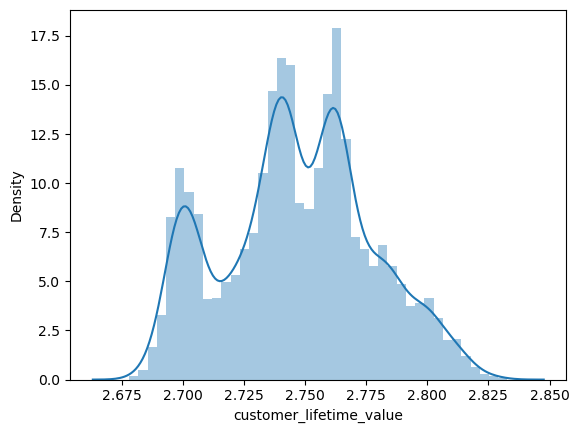

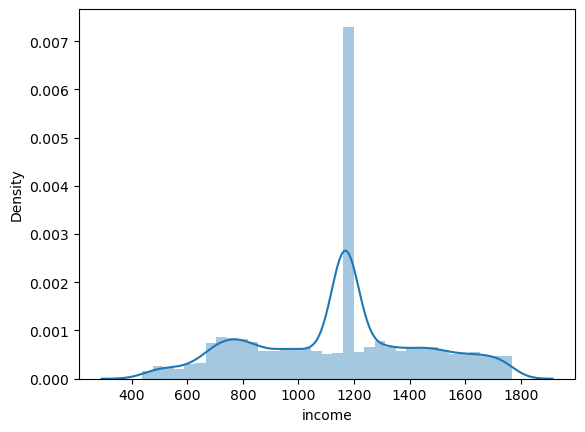

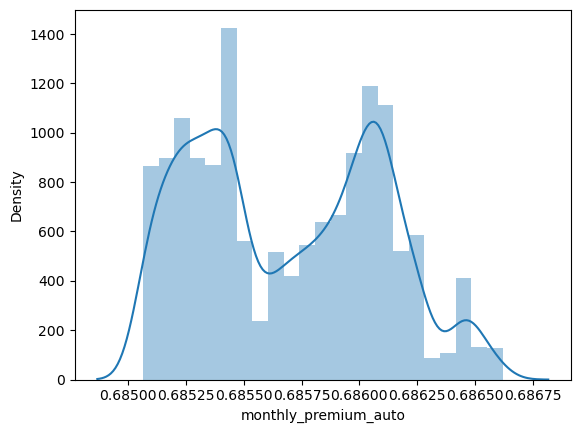

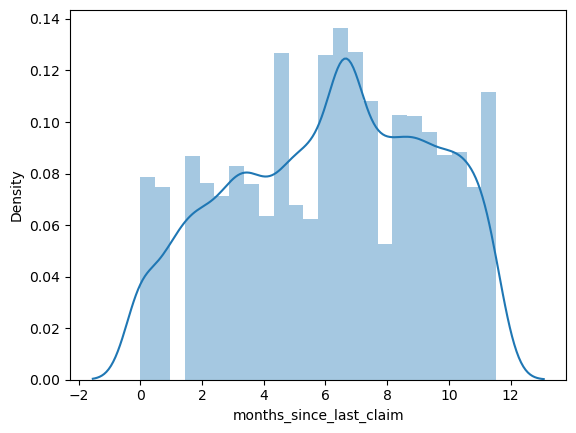

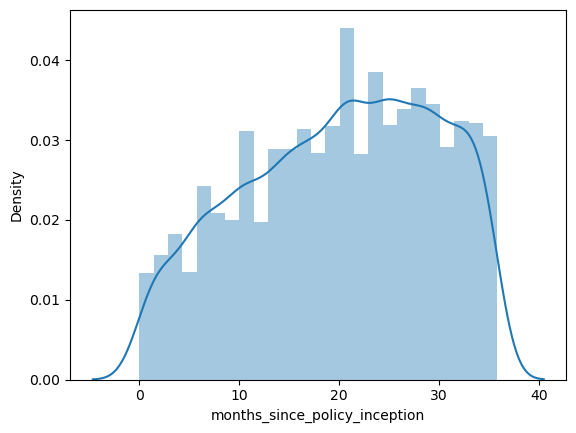

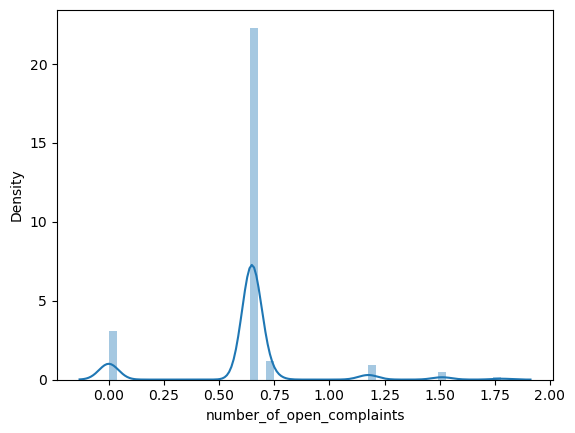

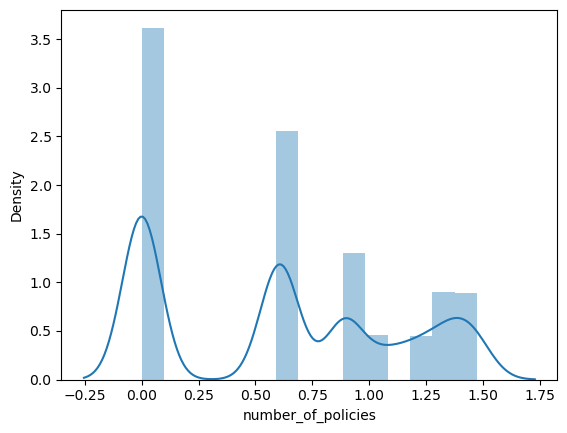

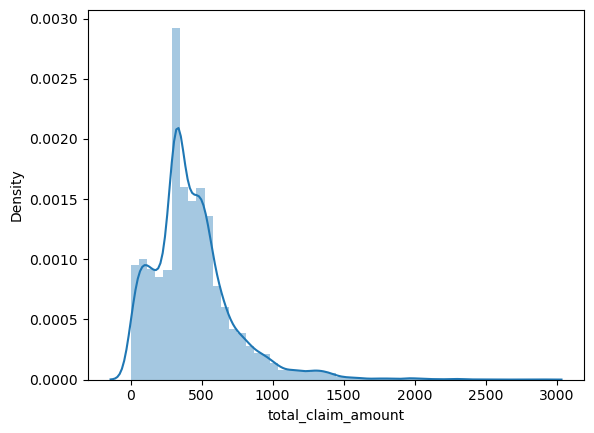

In [20]:
for column in data_trans.select_dtypes(np.number).columns: # check the distributions
    sns.distplot(data_trans[column])
    plt.show()

**Comment: ** The distributions look worse. So I will use another scaling method

In [ ]:
transformer = StandardScaler().fit(numerical)
x_standardized = transformer.transform(numerical)

In [ ]:
X_num_stand = pd.DataFrame(x_standardized, columns=numerical.columns)
X_num_stand.head()

In [ ]:
sns.distplot(X_num_stand['customer_lifetime_value'])

In [ ]:
sns.distplot(X_num_stand['income'])

In [ ]:
data1 = data.copy()

def log_transfom_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN # or with np.NAN to change it to the mean afterwards with .fillna()

#data1['HV1'] = data1['HV1'].apply(log_transfom_clean)

data1['income'] = list(map(log_transfom_clean, data1['income']))

data1['income'] = data1['income'].fillna(np.mean(data1['income']))

sns.distplot(data1['income'])
plt.show()

In [ ]:
def log_transfom_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN # or with np.NAN to change it to the mean afterwards with .fillna()

#data1['HV1'] = data1['HV1'].apply(log_transfom_clean)

data1['monthly_premium_auto'] = list(map(log_transfom_clean, data1['monthly_premium_auto']))

data1['monthly_premium_auto'] = data1['monthly_premium_auto'].fillna(np.mean(data1['monthly_premium_auto']))

sns.distplot(data1['monthly_premium_auto'])
plt.show()

# use a different ratio of train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

In [ ]:
predictions = model.predict(X_test)
predictions

In [ ]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
print("R2 = ", r2)
print("RMSE = ", RMSE)
print("The value of the metric MSE is ", MSE)
print("MAE = ", MAE)